<a href="https://colab.research.google.com/github/ehestir/Du-Bois-STEM/blob/main/python_popmap_dubois-key_erin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implement** a Du Bois Choropleth Map with **Python**:

## Map of Black Population

<div>
<img src="https://github.com/ajstarks/dubois-data-portraits/blob/master/plate02/original-plate-02.jpg?raw=true" width="700" />
</div>

<b>Plate 02</b>

### This interactive exercise is inspired by the annual #DuBoisChallenge

The #DuBoisChallenge is a call to scientists, students, and community members to recreate, adapt, and share on social media the data visualzations created by W.E.B. Du Bois and his collaborators in 1900. Before doing the interactive exercise, please read this article about the [Du Bois Challenge](https://nightingaledvs.com/the-dubois-challenge/) You can find the latest Du Bois visualizations by searching for the [#DuBoisChallenge2025](https://github.com/ajstarks/dubois-data-portraits/tree/master/challenge/2025) hash tag on social media (Twitter, Bluesky, Insta etc). And you can even use the hashtag to share your own recreations.

### In this interactive excercise, you will:
1. Learn how to create a variation of a **choropleth map**.
2. Learn and modify code in the programming lanugage **Python**.
3. Learn how to write spatial and statistical code to:
    * create visualizations that consistently and accurately represent your data
    * create a transparent record of exactly how you visualized something
    * make it easy for you or others to recreate or modify your visualization
4. Your instructor may also ask you answer questions and submit screenshots as you go in a parallel Catcourses (or other Canvas system) as you go.

### You will learn how to use the *Python* programming language by creating a choropleth map:
1. You will recreate Du Bois' visualization of Black population across US states. Du Bois created the visualization in 1900.
2. You will reproduce Du Bois' visualization using data on Black population in the US today. Du Bois used cartography to the show geographical patterns of enslavement and emancipation for Black Americans.
3. An important context of Du Bois's map is history of the African slave trade. The first visual in the 1900 exhibition is a map of world and lines showing the transatlantic slave trade. In the U.S. maps there is clustering of Black population to the southern states and the state of Georgia. Here is Du Bois plate 1 prefacing plate 2:

<div>
<img src="https://github.com/ajstarks/dubois-data-portraits/blob/master/plate01/original-plate-01.jpg?raw=true" width="700"/>
</div>
<b>Plate 01</b>

# KEY FOR 2020 MAP

In [15]:
#Step a: Read the csv file
fp_data="https://github.com/HigherEdData/Du-Bois-STEM/raw/refs/heads/main/data/d_2020.csv"
df = pd.read_csv(fp_data)
df.head()

,GISJOIN,STATENAM,blkpop_cat
0,G010,Alabama,"750,000 AND OVER"
1,G020,Alaska,"10,000 - 25,000"
2,G040,Arizona,"300,000 - 500,000"
3,G050,Arkansas,"300,000 - 500,000"
4,G060,California,"750,000 AND OVER"


In [16]:
#Step b: Read the state 2020 shapefile and plot the map.
fp_map="https://github.com/HigherEdData/Du-Bois-STEM/raw/refs/heads/main/data/us_state_2020/us_state_2020_reduced.shp"
gdf = gpd.read_file(fp_map)
gdf.head()

,STATENAM,geometry
0,Alabama,"MULTIPOLYGON (((763205.386 -783799.782, 763007..."
1,Arizona,"POLYGON ((-1581748.321 94658.552, -1382280.225..."
2,Arkansas,"POLYGON ((559472.704 -149504.267, 561049.286 -..."
3,California,"MULTIPOLYGON (((-1959193.572 -309021.425, -195..."
4,Colorado,"POLYGON ((-671177.633 420817.406, -504621.167 ..."


<Axes: >

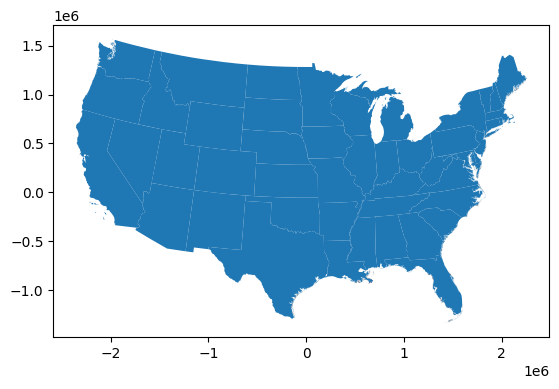

In [17]:
gdf.plot()

In [18]:
#Step c: Merge the dataframe with the shapefile using STATENAM
gdf_recreate = gdf.merge(df, on='STATENAM')
gdf_recreate.head()

,STATENAM,geometry,GISJOIN,blkpop_cat
0,Alabama,"MULTIPOLYGON (((763205.386 -783799.782, 763007...",G010,"750,000 AND OVER"
1,Arizona,"POLYGON ((-1581748.321 94658.552, -1382280.225...",G040,"300,000 - 500,000"
2,Arkansas,"POLYGON ((559472.704 -149504.267, 561049.286 -...",G050,"300,000 - 500,000"
3,California,"MULTIPOLYGON (((-1959193.572 -309021.425, -195...",G060,"750,000 AND OVER"
4,Colorado,"POLYGON ((-671177.633 420817.406, -504621.167 ...",G080,"200,000 - 300,000"


In [19]:
#* Step d: Read dictionaries and functions for color and legend
#This is a dictionary of color labels to HEX numbers.
dubois_colors = {
    'black': '#000000',
    'brown': '#654321',
    'tan': '#d2b48c',
    'gold': '#ffd700',
    'pink': '#ffc0cb',
    'crimson': '#dc143c',
    'green': '#00aa00',
    'blue': '#4682b4',
    'purple': '#7e6583',
    'bg': '#FAF0E6',
    'white': '#ffffff',
    'lightgrey':  '#d3d3d3',
}

#This is a dictionary links Population categories with color labels
color_map = {
    'UNDER - 10,000': dubois_colors['lightgrey'],
    '10,000 - 25,000': dubois_colors['gold'],
    '25,000 - 50,000': dubois_colors['pink'],
    '50,000 - 100,000': dubois_colors['crimson'],
    '100,000 - 200,000': dubois_colors['tan'],
    '200,000 - 300,000': dubois_colors['blue'],
    '300,000 - 500,000': dubois_colors['brown'],
    '500,000 - 600,000': dubois_colors['white'],
    '600,000 - 750,000': dubois_colors['white'],
    '750,000 AND OVER': dubois_colors['black'],
}

#This is dictionary of category labels
range_map = {
    'UNDER - 10,000': 'UNDER - 10,000',
    '10,000 - 25,000': '10,000 - 25,000',
    '25,000 - 50,000': '25,000 - 50,000',
    '50,000 - 100,000': '50,000 - 100,000',
    '100,000 - 200,000': '100,000 - 200,000',
    '200,000 - 300,000': '200,000 - 300,000',
    '300,000 - 500,000': '300,000 - 500,000',
    '500,000 - 600,000': '500,000 - 600,000',
    '600,000 - 750,000': '600,000 - 750,000',
    '750,000 AND OVER': '750,000 BLACK POP AND OVER'
}

def map_colors(value):
    if value not in color_map:
        return 'white'

    return color_map[value]

gdf_recreate['colors pop'] = gdf_recreate.apply(lambda row: map_colors(row['blkpop_cat']), axis=1)

# preview colour data
gdf_recreate.head()

,STATENAM,geometry,GISJOIN,blkpop_cat,colors pop
0,Alabama,"MULTIPOLYGON (((763205.386 -783799.782, 763007...",G010,"750,000 AND OVER",#000000
1,Arizona,"POLYGON ((-1581748.321 94658.552, -1382280.225...",G040,"300,000 - 500,000",#654321
2,Arkansas,"POLYGON ((559472.704 -149504.267, 561049.286 -...",G050,"300,000 - 500,000",#654321
3,California,"MULTIPOLYGON (((-1959193.572 -309021.425, -195...",G060,"750,000 AND OVER",#000000
4,Colorado,"POLYGON ((-671177.633 420817.406, -504621.167 ...",G080,"200,000 - 300,000",#4682b4


Text(-900000, 2200000, 'Recreated by Camila Alvarez')

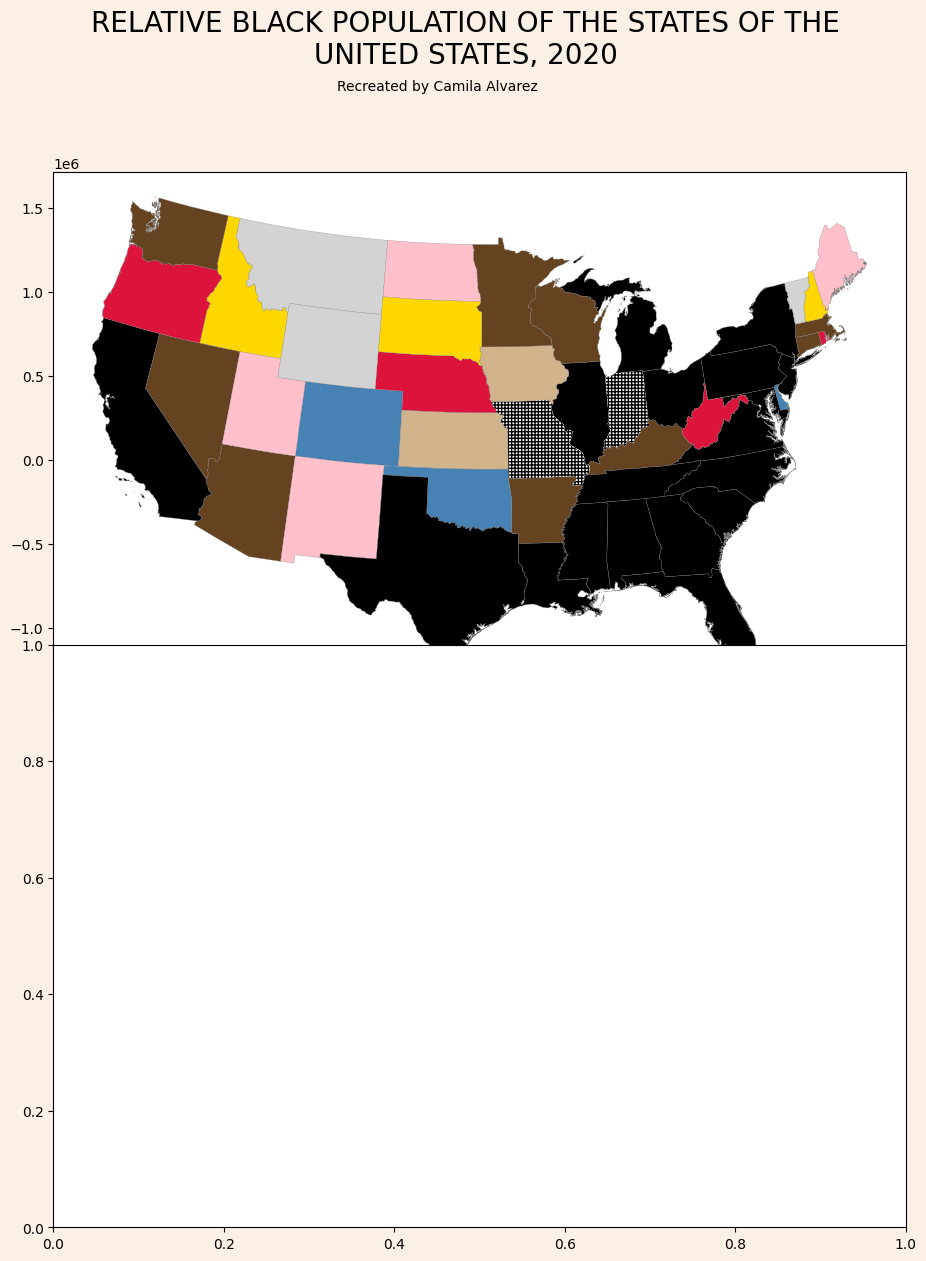

In [20]:
#Step f: Plot a choropleth map with Du Bois colors with background
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15},
    facecolor=dubois_colors['bg'] #1: fill in the background color
)

axes = axs.flat

gdf_recreate.plot(ax=axes[0], color=gdf_recreate['colors pop'], edgecolor='grey', lw=.2)  #2: fill in the categorical variable 'colors pop'
gdf_recreate[gdf_recreate["blkpop_cat"] == "600,000 - 750,000"].plot(ax=axes[0], facecolor="white", hatch="+++++")

fig.suptitle(r"RELATIVE BLACK POPULATION OF THE STATES OF THE" "\n" "UNITED STATES, 2020", y=.98, fontsize=20)
axs[0].text(-900000,2200000, r'Recreated by Camila Alvarez', fontsize=10) #3: add your name

Text(-900000, 2900000, 'Recreated by Camila Alvarez')

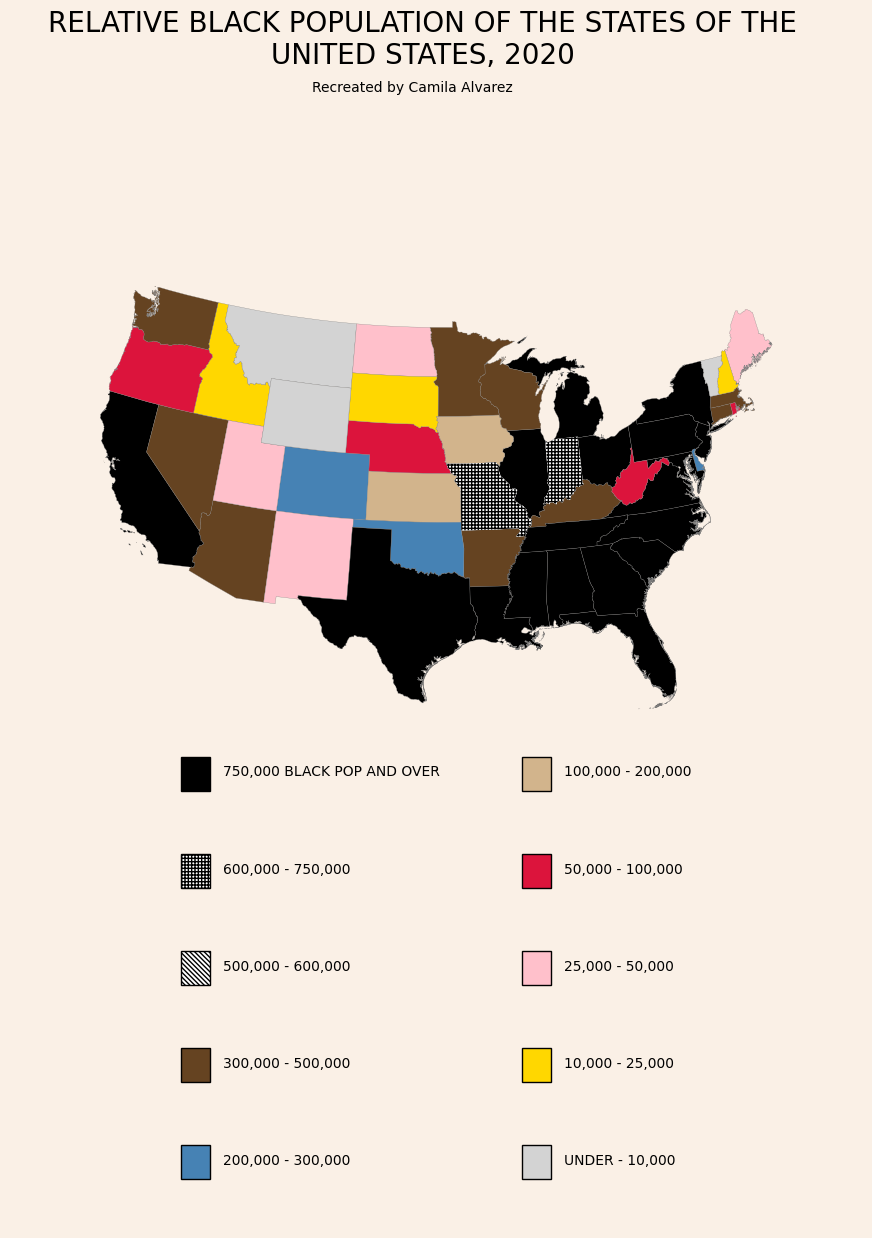

In [21]:
#Step g: Plot a choropleth map with Du Bois colors with background and legend
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15},
    facecolor=dubois_colors['bg']
)

axes = axs.flat

gdf_recreate.plot(ax=axes[0], color=gdf_recreate['colors pop'], edgecolor='grey', lw=.2)
gdf_recreate[gdf_recreate["blkpop_cat"] == "600,000 - 750,000"].plot(ax=axes[0], facecolor="white", hatch="+++++")

axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1, 5)
axs[0].set_ylim(-1500000, 2500000)

for index, color in enumerate(color_map):
    if index < 5:
        axes[1].add_patch(plt.Rectangle((0.6, index-.5), .035,.35, facecolor=color_map[color], edgecolor='black')) #1: Fill in 'black' for edgecolor
        axes[1].annotate(range_map[color], (.65,index-.35))
    elif index == 7:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .035,.35, hatch=7*chr(92), facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.25,index-5.35))
    elif index == 8:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .035,.35, hatch='+++++', facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.25,index-5.35))
    else:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .035,.35, facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.25,index-5.35))

for ax in axes:
    ax.axis('off') #2: Fill in 'off' to turn off the axes

fig.suptitle(r"RELATIVE BLACK POPULATION OF THE STATES OF THE" "\n" "UNITED STATES, 2020", y=.98, fontsize=20)
axs[0].text(-900000,2900000, r'Recreated by Camila Alvarez', fontsize=10) #3: add your name

### 13. Export a final HTML file of your Notebook

Now that you're done, remember to export a final HTML file showing your work and displaying your name within the visualizations you created.

As noted above, you can export the Notebook by clicking the **File** dropdown above, selecting **Export File As** and then selecting **HTML** as shown here:
<div>
<img src="https://github.com/HigherEdData/Du-Bois-STEM/blob/main/readings-images/htmlexport.jpg?raw=true" width="500" />
</div>

# More Resources and References

Github Repository for the #DuboisChallenge2024
https://github.com/ajstarks/dubois-data-portraits/blob/master/challenge/2024/README.md

Du Bois Challenge 2024 Recap
https://speakerdeck.com/ajstarks/du-bois-challenge-2024-recap

2024 Du Bois Challenge using R Programming.
https://medium.com/illumination/2024-du-bois-challenge-using-r-programming-02af8afa5626

Developing Du Bois’s Data Portraits with Python and Matplotlib
https://www.edriessen.com/2024/02/07/developing-du-boiss-data-portraits-with-python-and-matplotlib/

Three Tricks I Learned In The Du Bois Data Visualization Challenge
https://nightingaledvs.com/recreating-historical-dataviz-three-tricks-i-learned-in-the-du-bois-data-visualization-challenge/

Molly Kuhs Du Bois Challenge repo
https://github.com/makuhs/DuboisChallenge

#DuBoisChallenge2024 using Python and Matplotlib
https://github.com/edriessen/dubois24-python-matplotlib

#DuboisChallenge2024 using R
https://github.com/sndaba/2024DuBoisChallengeInRstats/tree/main

#DuboisChallenge2024 using Tableau
https://public.tableau.com/app/profile/camaal.moten7357/vizzes

### 1. How to use this interactive **Jupyter Notebook**

If you know how to use Python on your own computer with another code runner you can copy, paste, and edit code there. If you have Jupyter Lab, you can also download this Notebook to use it on your own computer. You can download the Notebook or view a non-interactive version of this Notebook by clicking here.

Grey cells in the *Notebook* like the one below are code cells where you will write and edit **Python** Code. To try it out:

1. Click your cursor on the grey cell below. After you click on it, it will change to white to indicate you are editing it.
2. After you click on the cell below and it turns white. Type ```2+2``` to use Python as a calculator.
3. After typing ```2+2```, click the <span class="play-button">&#9654;</span> play button at the top of this page.

### 2. Keeping track of your work and using **Python** outside of this notebook.

If you leave this Notebook idle or close/re-open it, your work will not be saved in the Notebook. But you can export an HTML file showing your work at any time. You can then open and browse the HTML file in any web browser.

And after completing the Notebook exercises, you can export a final HTML file to submit for any course assignments using this Notebook.

To export the *Notebook*, click the **File** dropdown above, select **Export File As** and then select **HTML** as shown here:

<div>
<img src="https://github.com/HigherEdData/Du-Bois-STEM/blob/main/readings-images/htmlexport.jpg?raw=true" width="500" />
</div>

### 3. Getting hints and answers.

Sometimes, the code cells will already have code in them that you will be asked to edit or run by clicking the play button. In the process, you can click on <span class="play-button">&#9654;</span> dropdown buttons like the ones below to get hints and answers. For example:

1. Click on the cell below with ```3+3=``` and click the play triangle above. You should get an error message highlighted in pink saying "SyntaxError: cannot assign to expression". To complete this activity, you'll want to get each code cell to run without a pink error message.
2. Based on the ```2+2``` code you tried above, try to edit the 3+3= code to get it to report the sum of 3+3 without the error message. For a hint, click the first <span class="play-button">&#9654;</span> button below.

<details> <summary>Click this triangle for a hint.</summary>

Try deleting the ```=``` sign in the cell and click play again. If that doesn't work, click the next triangle below for the answer.

</details>

<details> <summary>Click this triangle for the answer.</summary>

**Answer:** Delete all the text in the cell below and write or paste this answer in the cell: ```3+3``` before clicking play again.

</details>

In [22]:
3+3

6

### 4. Reading and writing comments that explain your code

In code cells, we can write **comment** text that explains our code. We put a ```#```  before **comment** text to tell Python that the text is not code it should execute. Any text after a ```#``` on a given line will be treated as a **comment**. In Jupyter, comment text after a ```#``` will be displayed in a dark turquois color. To see how this works, try the following below:

1. Try to run the code below. You should get an error message because the comment text "This is code that adds 2+2" is not Python code and doesn't have a #  sign in front of it.
2. Add a #  sign before "This is code that adds 2+2". This should change the color of the text to turquois like the text after the 2+2 where there is already a #  sign.
3. Click the <span class="play-button">&#9654;</span> at the top of the notebook and the code should run and output **4** below.

In [23]:
This is code that adds 2+2

2+2 # the result of 2 +2 should be 4

SyntaxError: invalid syntax (ipython-input-23-1675485591.py, line 1)

### 5. Importing libraries
In **Python**, users can import libraries which a range of tools we can call on for our code. These are the most common libraries pertaining to statisitcs, mapping, and visualizations:
* **pandas** is a library with statistical capacities including data management.
* **geopandas** is the library has geospatial abilities.
* **matplotlib** is a library with data visualizations, we will be using pyplots, colors, and patches.

In today's workbook, we will rely on these libraries.

Once you have the appropriate **Python** libraries, you call on these libraries at the beginning of your **Python** code script. There are three ways to call libraries:

1. Call on the library the basic way: import library_name
2. Call on the library and add aliases to call it easily: import library_name as lib
3. Call on specifics functions from library: import library.function as fun

In [2]:
#importing necessary libaries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

### 6. Reading Du Bois' data into an **Pandas** Data Frame

Next step is to read data in a **pandas** dataframe.

For this exercise, we're going to read in data from a website. And we're going to place the data into a dataframe named d_pop.

**Pandas** allows us to read a comma-separated values (csv) file to a dataframe.  File paths should be used with parentheses:

```df = pd.read_csv("web_address_with_data/data_file_name.csv")```

* <b>```.df.head()```</b>

We use the **pandas** ```df.head()``` to check that the data has been read correctly. ```df.head()``` shows the first five rows of the data:

```df.head()```

<details> <summary><strong>Hints:</strong></summary>

When reading in a dataframe with Pandas, you should specify Pandas with its alias:
    
**Answer:** ```data = pd.read_csv(url="https://github.com/HigherEdData/Du-Bois-STEM/raw/refs/heads/main/data/d_popmap.csv")```
    
</details>

In [ ]:
url="https://github.com/HigherEdData/Du-Bois-STEM/raw/refs/heads/main/data/d_popmap.csv"
data = __.read_csv(url)
data.head()

In [24]:
url="https://github.com/HigherEdData/Du-Bois-STEM/raw/refs/heads/main/data/d_popmap.csv"
data = pd.read_csv(url)
data.head()

,State,STATENAM,Population
0,AL,Alabama,"600,000 - 750,000"
1,AR,Arkansas,"300,000 - 500,000"
2,AZ,Arizona Territory,"UNDER - 10,000"
3,CA,California,"10,000 - 25,000"
4,CO,Colorado,"UNDER - 10,000"


### 7. Using **GeoPandas** to read, plot, and edit a shapefile
Since we are making a map, we need a *shapefile*--a data file with geographical components. **Geopandas** is a library with geospatial data tools. __[NHGIS]("https://www.nhgis.org/")__ provides free historical shapefiles for non-commercial use. Note that *Plate 02* is a 1900 map of the United States.

Two interesting features of the Du Bois **Plate 02**. First, the map is a contiguous U.S., meaning it does not include Alaska and Hawaii. Second, the area known today as Oklahoma is divided into states: Oklahoma and Indian Terrority.

* <b>Reading a geospatial data</b>

Using **GeoPandas**, you read shapefile files into geospatial dataframes using ```gpd.read_file()```. File paths should be used with parentheses. Again we can use the ```gdf.head()``` to check the data has been read. Notice the geometry column is the geographical reference.

```gdf = gpd.read_file(fp)```

* <b>Plotting geospatial data</b>

Once a geospatial dataframe is loaded, use the ```gpd.plot()``` to visually examine our shapefile.

```gpd.plot()```

<details> <summary><strong>Hints:</strong></summary>

When reading the shapefile, you call on the GeoPandas library using the alias:
    
**Answer:** ```gdf = gpd.read_file(fp)```
    
</details>

In [ ]:
fp_map="https://github.com/HigherEdData/Du-Bois-STEM/raw/refs/heads/main/data/us_state_1900/us_state_1900_reduced.shp"
gdf = ___.read_file(fp_map)
gdf.head()

In [ ]:
gdf.plot()

In [ ]:
fp_map="https://github.com/HigherEdData/Du-Bois-STEM/raw/refs/heads/main/data/us_state_1900/us_state_1900_reduced.shp"
gdf = gpd.read_file(fp_map)
gdf.head()

In [ ]:
gdf.plot()

### 8. Merging table data with the shapefile
Often times, we need to link a dataframes to a spatial dataframe. Using **GeoPandas**, we can easily marge table data with the shapefile using the merge command. When merging two dataframes, it is important to identify the key variable that will link the two datasets. In this example, the key variable is STATENAM.

```gdf_new = spatial_df.merge(df, on='key_variable')```

<details> <summary><strong>Hints:</strong></summary>

Look at the example code.
    
**Answer:**   
```gdf_new = gdf.merge(data, on='STATENAM')```
    
</details>

In [ ]:
gdf_new = gdf._____(data, on='STATENAM')
gdf_new.head()

In [ ]:
#gdf.head()
data.head()

In [ ]:
gdf_new = gdf.merge(data, on='STATENAM')
gdf_new.head()

### 9. Using **GeoPandas** to plot a **choropleth map**
**Choropleth maps** are maps that plot categories using different colors or patterns. It is easy to create **choropleth map** in **GeoPandas** simply by choosing a variable.

```gdf.plot('variable')```

* <b>Modify the line color and width for sharper maps. lw means line width.</b>

```gdf.plot('variable', edgecolor='color', lw=#)```

Plot a chorpleth map using ```Population``` variable.

<details> <summary><strong>**Answer:** </strong></summary>

```gdf_new.plot('Population', edgecolor='black', lw=.1)```
    
</details>

In [ ]:
gdf_new.plot('____', edgecolor='black', lw=.1)

KeyError: 'Population'

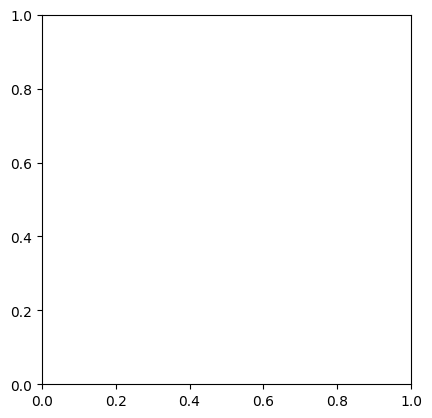

In [18]:
gdf_new.plot('Population', edgecolor='black', lw=.1)

### 10. Using dictionaries and functions in **Python**

The **choropleth map** made in Step 9 does not match the colors from the original **Plate 02**. In order to specify the color, we need to do some additional coding.

* <b>Dictionaries in **Python**</b>

In **Python**, a dictionary is a list of pairs and in the form of: ```key:values```.

```dict1 = {'a':1, 'b':2}```

* <b> **Functions** in **Python** </b>
    
In Python, you can write functions to perform a iteration of tasks. For example, linking our data with the color and label dicionaries.

* <b>Using dictionaries and functions for color and legend</b>

We can use dictionaries and functions to connect variable categories to labels and color schemes. Dictionarieis can be helpful here from translating from color names to HEX numbers. **__[The Du Boisian Visualization Toolkit]("https://www.dignityanddebt.org/projects/du-boisian-resources/")__** shares the color scheme within Du Bois data visualizations.

During **#DuBoisChallenge** in 2024, **__[Edriessen published in Github]("https://github.com/edriessen/dubois24-python-matplotlib/tree/main)__** uses the toolkit to write dictionaries and functions in Python. We use Edriessen's approach.

In [ ]:
#This is a dictionary of color labels to HEX numbers.
dubois_colors = {
    'black': '#000000',
    'brown': '#654321',
    'tan': '#d2b48c',
    'gold': '#ffd700',
    'pink': '#ffc0cb',
    'crimson': '#dc143c',
    'green': '#00aa00',
    'blue': '#4682b4',
    'purple': '#7e6583',
    'bg': '#FAF0E6',
    'white': '#ffffff',
    'lightgrey':  '#d3d3d3',
}

#This is a dictionary links Population categories with color labels
color_map = {
    'UNDER - 10,000': dubois_colors['lightgrey'],
    '10,000 - 25,000': dubois_colors['gold'],
    '25,000 - 50,000': dubois_colors['pink'],
    '50,000 - 100,000': dubois_colors['crimson'],
    '100,000 - 200,000': dubois_colors['tan'],
    '200,000 - 300,000': dubois_colors['blue'],
    '300,000 - 500,000': dubois_colors['brown'],
    '500,000 - 600,000': dubois_colors['white'],
    '600,000 - 750,000': dubois_colors['white'],
    '750,000 AND OVER': dubois_colors['black'],
}

#This is dictionary of category labels
range_map = {
    'UNDER - 10,000': 'UNDER - 10,000',
    '10,000 - 25,000': '10,000 - 25,000',
    '25,000 - 50,000': '25,000 - 50,000',
    '50,000 - 100,000': '50,000 - 100,000',
    '100,000 - 200,000': '100,000 - 200,000',
    '200,000 - 300,000': '200,000 - 300,000',
    '300,000 - 500,000': '300,000 - 500,000',
    '500,000 - 600,000': '500,000 - 600,000',
    '600,000 - 750,000': '600,000 - 750,000',
    '750,000 AND OVER': '750,000 NEGROS AND OVER'
}

def map_colors(value):
    if value not in color_map:
        return 'white'

    return color_map[value]

gdf_new['colors pop'] = gdf_new.apply(lambda row: map_colors(row['Population']), axis=1)

# preview colour data
gdf_new.head()

In [ ]:
#This is a dictionary of color labels to HEX numbers.
dubois_colors = {
    'black': '#000000',
    'brown': '#654321',
    'tan': '#d2b48c',
    'gold': '#ffd700',
    'pink': '#ffc0cb',
    'crimson': '#dc143c',
    'green': '#00aa00',
    'blue': '#4682b4',
    'purple': '#7e6583',
    'bg': '#FAF0E6',
    'white': '#ffffff',
    'lightgrey':  '#d3d3d3',
}

#This is a dictionary links Population categories with color labels
color_map = {
    'UNDER - 10,000': dubois_colors['lightgrey'],
    '10,000 - 25,000': dubois_colors['gold'],
    '25,000 - 50,000': dubois_colors['pink'],
    '50,000 - 100,000': dubois_colors['crimson'],
    '100,000 - 200,000': dubois_colors['tan'],
    '200,000 - 300,000': dubois_colors['blue'],
    '300,000 - 500,000': dubois_colors['brown'],
    '500,000 - 600,000': dubois_colors['white'],
    '600,000 - 750,000': dubois_colors['white'],
    '750,000 AND OVER': dubois_colors['black'],
}

#This is dictionary of category labels
range_map = {
    'UNDER - 10,000': 'UNDER - 10,000',
    '10,000 - 25,000': '10,000 - 25,000',
    '25,000 - 50,000': '25,000 - 50,000',
    '50,000 - 100,000': '50,000 - 100,000',
    '100,000 - 200,000': '100,000 - 200,000',
    '200,000 - 300,000': '200,000 - 300,000',
    '300,000 - 500,000': '300,000 - 500,000',
    '500,000 - 600,000': '500,000 - 600,000',
    '600,000 - 750,000': '600,000 - 750,000',
    '750,000 AND OVER': '750,000 NEGROS AND OVER'
}

def map_colors(value):
    if value not in color_map:
        return 'white'

    return color_map[value]

gdf_new['colors pop'] = gdf_new.apply(lambda row: map_colors(row['Population']), axis=1)

# preview colour data
gdf_new.head()

### 10.5 Update the **choropleth map**

Now, that everything been linked, we can now map a choropleth map using Du Bois colors.

<details> <summary><strong>**Answer:** </strong></summary>

```gdf_new.plot(color=gdf_new['colors pop'], edgecolor='black', lw=.1)```
    
</details>

In [ ]:
gdf_new.___(color=gdf_new['colors pop'], edgecolor='black', lw=.1)

In [ ]:
gdf_new.plot(color=gdf_new['colors pop'], edgecolor='black', lw=.1)

### 11. Using **mathplotlib** to make subplots

Subplots allows us to create a figure with mutiple plots in a grid and we can modify them. The most basic is single plot:

```fig, ax = plt.subplots(figsize=(height, width), faceolor='color')```

<b>If we want to make a grid:</b>

```fig, axes = plt.subplots(row_num, col_num,figsize=(height, width), faceolor='color')```

In order to recreate **Plate 02**, we want to plot the map in top and the legend in the lower plot.

Below correct the code to make a 11 inch width and 14 inch height. Also, use bg (background) for the facecolor.

<details> <summary><strong>**Answer:** </strong></summary>

```    facecolor=dubois_colors['bg']```
    
</details>

In [ ]:
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(x,y),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15
    },
    facecolor=dubois_colors['___'] #1: Add 'bg' as background color
)

# This makes the plot 2D
axes = axs.flat

In [ ]:
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15
    },
    facecolor=dubois_colors['bg']
)

# This makes the plot 2D
axes = axs.flat

### Step 11.1 Building visual

<b>Next, we will add the plot we made earlier to the code from step 10.5. We will also add the title</b>

<details> <summary><strong>**Answer:** </strong></summary>

```fig.suptitle(r"RELATIVE NEGRO POPULATION OF THE STATES OF THE" "\n" "UNITED STATES", y=.98 , fontsize=23)```
    
</details>

In [ ]:
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15
    },
    facecolor=dubois_colors['bg']
)

axes = axs.flat

#set axes bounds
axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1, 5)
axs[0].set_ylim(-1500000, 2500000)

gdf_new.plot(ax=axes[0], color=gdf_new['colors pop'], edgecolor='black', lw=.2)

# set title
fig.suptitle(r"RELATIVE NEGRO POPULATION OF THE STATES OF THE" "\n" "______", y=.98 , fontsize=23) #1: finish the title name based on Du Bois plate 02
axs[0].text(-900000,2800000, r'Recreated by _______________', fontsize=10) #12 Add your name

In [ ]:
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15
    },
    facecolor=dubois_colors['bg']
)

axes = axs.flat

axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1, 5)
axs[0].set_ylim(-1500000, 2500000)

gdf_new.plot(ax=axes[0], color=gdf_new['colors pop'], edgecolor='black', lw=.2)

fig.suptitle(r"RELATIVE NEGRO POPULATION OF THE STATES OF THE" "\n" "UNITED STATES", y=.98 , fontsize=23)
axs[0].text(-900000,2800000, r'Recreated by Camila Alvarez', fontsize=10)

### Step 11.2 Using *plot()* to make pattern map

We can use conditional statements with the *plot()* command to make pattern/texture map. The original *Plate 02* has two pattern categories: "600,000-750,000" is grid and "500,000-600,000" is slash. In *matplotlib*, you can use "+" for grid and chr(92) for "\".

````gdf[gdf["variable"] == "SINGLE_CATEGORY"].plot(facecolor="color", hatch="pattern")````

<details> <summary><strong>**Answer:** </strong></summary>

````gdf_new[gdf_new["Population_"] == "500,000 - 600,000"].plot(ax=axes[0], facecolor="white", hatch= 7*chr(92))````

````gdf_new[gdf_new["Population_"] == "600,000 - 750,000"].plot(ax=axes[0], facecolor="white", hatch="+++++")````
    
</details>

In [ ]:
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15
    },
    facecolor=dubois_colors['bg']
)

axes = axs.flat

axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1, 5)
axs[0].set_ylim(-1500000, 2500000)

gdf_new.plot(ax=axes[0], color=gdf_new['colors pop'], edgecolor='black', lw=.2)
gdf_new[gdf_new["Population"] == "CATEGORY"].plot(ax=axes[0], facecolor="white", hatch= 7*chr(92)) #3: Add category name for the grid
gdf_new[gdf_new["Population"] == "CATEGORY"].plot(ax=axes[0], facecolor="white", hatch="+++++") #2: Add category name for the slash

fig.suptitle(r"RELATIVE NEGRO POPULATION OF THE STATES OF THE" "\n" "UNITED STATES", y=.98, fontsize=23)
axs[0].text(-900000,2800000, r'Recreated by __________', fontsize=10) #1: Add your name

In [ ]:
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15
    },
    facecolor=dubois_colors['bg']
)

axes = axs.flat

axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1, 5)
axs[0].set_ylim(-1500000, 2500000)

gdf_new.plot(ax=axes[0], color=gdf_new['colors pop'], edgecolor='black', lw=.2)
gdf_new[gdf_new["Population"] == "500,000 - 600,000"].plot(ax=axes[0], facecolor="white", hatch= 7*chr(92))
gdf_new[gdf_new["Population"] == "600,000 - 750,000"].plot(ax=axes[0], facecolor="white", hatch="+++++")

fig.suptitle(r"RELATIVE NEGRO POPULATION OF THE STATES OF THE" "\n" "UNITED STATES", y=.98, fontsize=23)
axs[0].text(-900000,2800000, r'Recreated by Camila Alvarez', fontsize=10)

### Step 11.3 Using loop to make the legend

Next is to make a legend. In order to make these conseNext, we make a loop to set up the legend and utilize the lower graph.

* <b> Loops </b> *
Loops are useful tool within coding to do repeat action until a condition is satisfied.

<i> For loops </i>
```for``` loops do a set of actions for each item in a array or list.

<i> If loops </i>
```if``` loops run a set of action IF the condition is satisfed. You can set mutiple conditions using the ```elif``` and ```else```

<details> <summary><strong>**Answer:** </strong></summary>

````ax.axis('off')````
    
</details>

In [ ]:
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15
    },
    facecolor=dubois_colors['bg']
)

axes = axs.flat

axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1, 5)
axs[0].set_ylim(-1500000, 2500000)

gdf_new.plot(ax=axes[0], color=gdf_new['colors pop'], edgecolor='black', lw=.2)
gdf_new[gdf_new["Population"] == "500,000 - 600,000"].plot(ax=axes[0], facecolor="white", hatch= 7*chr(92))
gdf_new[gdf_new["Population"] == "600,000 - 750,000"].plot(ax=axes[0], facecolor="white", hatch="+++++")

axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1, 5)
axs[0].set_ylim(-1500000, 2500000)

for index, color in enumerate(color_map):
    if index < 5:
        axes[1].add_patch(plt.Rectangle((0.6, index-.5), .05,.5, facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.7,index-.35))
    elif index == 7:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .05,.5, hatch=7*chr(92), facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.3,index-5.35))
    elif index == 8:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .05,.5, hatch='+++++', facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.3,index-5.35))
    else:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .05,.5, facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.3,index-5.35))

for ax in axes:
    ax.axis('___') #2: type 'off' to remove axes

fig.suptitle(r"RELATIVE NEGRO POPULATION OF THE STATES OF THE" "\n" "UNITED STATES", y=.98, fontsize=20)
axs[0].text(-900000,2800000, r'Recreated by __________', fontsize=10) #1: Add your name

In [ ]:
cd "D:\documents copy\research\Ongoing\DuBois HBCU HSI\Du bois map"

In [ ]:
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15
    },
    facecolor=dubois_colors['bg']
)

# to use the 2 subplots axes
axes = axs.flat

gdf_new.plot(ax=axes[0], color=gdf_new['colors pop'], edgecolor='black', lw=.2)
gdf_new[gdf_new["Population"] == "500,000 - 600,000"].plot(ax=axes[0], facecolor="white", hatch= 7*chr(92))
gdf_new[gdf_new["Population"] == "600,000 - 750,000"].plot(ax=axes[0], facecolor="white", hatch="+++++")

axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1, 5)
axs[0].set_ylim(-1500000, 2500000)

for index, color in enumerate(color_map):
    if index < 5:
        axes[1].add_patch(plt.Rectangle((0.6, index-.5), .05,.5, facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.7,index-.35))
    elif index == 7:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .05,.5, hatch=7*chr(92), facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.3,index-5.35))
    elif index == 8:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .05,.5, hatch='+++++', facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.3,index-5.35))
    else:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .05,.5, facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.3,index-5.35))

for ax in axes:
    ax.axis('off')

fig.suptitle(r"RELATIVE NEGRO POPULATION OF THE STATES OF THE" "\n" "UNITED STATES", y=.98, fontsize=20)
axs[0].text(-900000,2800000, r'Recreated by Camila Alvarez', fontsize=10)

plt.savefig('plate02_recreate.jpg')

### Step 12 Recreate the Du Bois Chrolopeth Map using Modern Data

Now, we will be recreating the figure above with 2020 data from the Census. As mentioned above, __[NHGIS]("https://www.nhgis.org/")__ provides historical data and shapefile for non-commercial use for free. Census data and shapefile are avaliable from the NHGIS.

There are two updated datasets:
* 2020 of Black population by state: data2020
* Shapefile of state: US_state_2020.shp

Try applying the 2020 data with the steps above in the following steps:
* Step a: Read the csv file
* Step b: Read the state 2020 shapefile and plot the map.
* Step c: Merge the dataframe with the shapefile using key variable STATENAM.
* Step d: Read dictionaries and functions for color and legend
* Step e: Plot a choropleth map with Du Bois colors
* Step f: Plot a choropleth map with Du Bois colors with background
* Step g: Plot a choropleth map with Du Bois colors with background and legend

# New Section

<details> <summary><strong>**Answer:** </strong></summary>

```df = pd.read_csv(fp_data)```
    
```df.head()```
    
</details>

In [ ]:
#Step a: Read the csv file
fp_data="https://github.com/HigherEdData/Du-Bois-STEM/raw/refs/heads/main/data/d_2020.csv"
df = ___.read_csv(fp_data)
df.head()

<details> <summary><strong>**Answer:** </strong></summary>

```gdf = gpd.read_file(fp_map)```
    
```gdf.head()```
    
```gdf.plot()```
    
</details>

In [ ]:
#Step b: Read the state 2020 shapefile and plot the map.
fp_map="https://github.com/HigherEdData/Du-Bois-STEM/raw/refs/heads/main/data/us_state_2020/us_state_2020_reduced.shp"
gdf = ___.read_file(fp_map)
gdf.head()

In [ ]:
___.plot()

<details> <summary><strong>**Answer:** </strong></summary>

```gdf_recreate = gdf.merge(df, on='STATENAM')```
```gdf_recreate.head()```
    
</details>

In [ ]:
#Step c: Merge the dataframe with the shapefile using STATENAM
gdf_recreate = gdf.merge(df, on='___')
gdf_recreate.head()

In [ ]:
#* Step d: Read dictionaries and functions for color and legend
#This is a dictionary of color labels to HEX numbers.
dubois_colors = {
    'black': '#000000',
    'brown': '#654321',
    'tan': '#d2b48c',
    'gold': '#ffd700',
    'pink': '#ffc0cb',
    'crimson': '#dc143c',
    'green': '#00aa00',
    'blue': '#4682b4',
    'purple': '#7e6583',
    'bg': '#FAF0E6',
    'white': '#ffffff',
    'lightgrey':  '#d3d3d3',
}

#This is a dictionary links Population categories with color labels
color_map = {
    'UNDER - 10,000': dubois_colors['lightgrey'],
    '10,000 - 25,000': dubois_colors['gold'],
    '25,000 - 50,000': dubois_colors['pink'],
    '50,000 - 100,000': dubois_colors['crimson'],
    '100,000 - 200,000': dubois_colors['tan'],
    '200,000 - 300,000': dubois_colors['blue'],
    '300,000 - 500,000': dubois_colors['brown'],
    '500,000 - 600,000': dubois_colors['white'],
    '600,000 - 750,000': dubois_colors['white'],
    '750,000 AND OVER': dubois_colors['black'],
}

#This is dictionary of category labels
range_map = {
    'UNDER - 10,000': 'UNDER - 10,000',
    '10,000 - 25,000': '10,000 - 25,000',
    '25,000 - 50,000': '25,000 - 50,000',
    '50,000 - 100,000': '50,000 - 100,000',
    '100,000 - 200,000': '100,000 - 200,000',
    '200,000 - 300,000': '200,000 - 300,000',
    '300,000 - 500,000': '300,000 - 500,000',
    '500,000 - 600,000': '500,000 - 600,000',
    '600,000 - 750,000': '600,000 - 750,000',
    '750,000 AND OVER': '750,000 BLACK POP AND OVER'
}

def map_colors(value):
    if value not in color_map:
        return 'white'

    return color_map[value]

gdf_recreate['colors pop'] = gdf_recreate.apply(lambda row: map_colors(row['blkpop_cat']), axis=1)

# preview colour data
gdf_recreate.head()

<details> <summary><strong>**Answer:** </strong></summary>

```facecolor=dubois_colors['bg']```
    
```gdf_recreate.plot(ax=axes[0], color=gdf_recreate['colors pop'], edgecolor='grey', lw=.2)```
    
</details>

In [ ]:
#Step f: Plot a choropleth map with Du Bois colors with background
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15},
    facecolor=dubois_colors['__'] #1: fill in the background color
)

axes = axs.flat

gdf_recreate.plot(ax=axes[0], color=gdf_recreate['_______'], edgecolor='grey', lw=.2)  #2: fill in the categorical variable 'colors pop'
gdf_recreate[gdf_recreate["blkpop_cat"] == "600,000 - 750,000"].plot(ax=axes[0], facecolor="white", hatch="+++++")

fig.suptitle(r"RELATIVE BLACK POPULATION OF THE STATES OF THE" "\n" "UNITED STATES, 2020", y=.98, fontsize=20)
axs[0].text(-900000,2200000, r'Recreated by ______', fontsize=10) #3: add your name

<details> <summary><strong>**Answer:** </strong></summary>

```axes[1].add_patch(plt.Rectangle((0.6, index-.5), .035,.35, facecolor=color_map[color], edgecolor='black'))```
    
```ax.axis('off')```
    
</details>

In [ ]:
#Step g: Plot a choropleth map with Du Bois colors with background and legend
fig, (axs) = plt.subplots(
    2,
    1,
    figsize=(11,14),
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.15},
    facecolor=dubois_colors['bg']
)

axes = axs.flat

gdf_recreate.plot(ax=axes[0], color=gdf_recreate['colors pop'], edgecolor='grey', lw=.2)
gdf_recreate[gdf_recreate["blkpop_cat"] == "600,000 - 750,000"].plot(ax=axes[0], facecolor="white", hatch="+++++")

axs[1].set_xlim(0, 1)
axs[1].set_ylim(-1, 5)
axs[0].set_ylim(-1500000, 2500000)

for index, color in enumerate(color_map):
    if index < 5:
        axes[1].add_patch(plt.Rectangle((0.6, index-.5), .035,.35, facecolor=color_map[color], edgecolor='___')) #1: Fill in 'black' for edgecolor
        axes[1].annotate(range_map[color], (.65,index-.35))
    elif index == 7:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .035,.35, hatch=7*chr(92), facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.25,index-5.35))
    elif index == 8:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .035,.35, hatch='+++++', facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.25,index-5.35))
    else:
        axes[1].add_patch(plt.Rectangle((0.2, index-5.5), .035,.35, facecolor=color_map[color], edgecolor='black'))
        axes[1].annotate(range_map[color], (.25,index-5.35))

for ax in axes:
    ax.axis('___') #2: Fill in 'off' to turn off the axes

fig.suptitle(r"RELATIVE BLACK POPULATION OF THE STATES OF THE" "\n" "UNITED STATES, 2020", y=.98, fontsize=20)
axs[0].text(-900000,2900000, r'Recreated by ______', fontsize=10) #3: add your name

# Erin's suggested edits/additions

I would prefer to sepnd less time on re-creating the exact DuBois aesthetic, and more on some of the mapping choices - if this is aligned with the objective. See some reccomended material below. Please feel free to incorporate some or all of it. At a minimum, messing around a bit with the normalize vs raw or different classifications would be nice.

## Understanding Choropleth Maps: A Foundation in Spatial Thinking

Choropleth maps are one of the most common ways to visualize geographic data. At their core, they show how much of something—like population density or median income—varies across different geographic areas, such as counties, states, or census tracts. They do this by shading each area in a color that reflects the relative value of the variable being mapped. Darker or more intense colors usually represent higher values, while lighter colors represent lower values.

The word choropleth comes from the Greek *choro*, meaning "region." These maps are designed to show data at the regional level, so they’re best used with data tied to specific areal units—think polygons on a map, like the shape of Merced County or the state of California.

Because choropleth maps aggregate data by geographic unit, we often need to group our data into a smaller number of categories, or *classes*. This step is called **classification**. Each class gets its own color, and all regions that fall within the same class are shaded the same. This helps simplify complex data so that it’s easier to interpret visually.

While modern mapping software allows us to create unclassed maps—where every unique value gets its own symbol or color—there are still good reasons to use classed choropleths. Grouping data reduces visual clutter and helps map readers focus on patterns rather than being overwhelmed by too much detail. It’s a balance between simplification and meaning.

Creating an effective choropleth map involves three key decisions:

1. **How many classes should I use?** Too many, and the map gets confusing; too few, and important detail is lost.

2. **What classification method should I apply?** Options include equal interval, quantiles, natural breaks, and more—each tells a slightly different story.

3. **How should I symbolize the data?** Thoughtful color choice matters. The color scheme needs to reflect the underlying pattern without misleading the viewer.

In sum, choropleth maps help us communicate non-spatial information—like health outcomes or economic indicators—through the spatial lens of a map. They sit at the intersection of data science, geography, and design, offering a powerful way to explore and share insights about our world.


## Reading in Tabular Data & Linking it to Spatial Data

First we are going to load in some data about the population distribution of the U.S. by Race/Ethnicity from 2023. These data come from [KFF’s State Health Facts](https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D#notes). Data Source: 2008-2023 American Community Survey, 1-year estimates, U.S. Census Bureau.

Note that the US total in this dataset excludes Puerto Rico.

In [16]:
import pandas as pd

url="https://raw.githubusercontent.com/ehestir/Du-Bois-STEM/main/raw_data.csv"
data = pd.read_csv(url, sep=',')
data.head()

,Location,White,Black,Hispanic,Asian,American Indian or Alaska Native,Native Hawaiian or Pacific Islander,Multiple Races,Total,Footnotes
0,United States,186596100.0,37952200.0,63733300.0,19312100.0,1659700.0,553500.0,16271700.0,326078600.0,1.0
1,California,12684400.0,1910700.0,15480200.0,5934000.0,97600.0,128600.0,1902600.0,38138100.0,NaN
2,New York,10066500.0,2505000.0,3783100.0,1714400.0,36600.0,5000.0,937800.0,19048400.0,NaN
3,Texas,11546600.0,3513700.0,11912000.0,1673500.0,43200.0,32600.0,1073800.0,29795500.0,NaN
4,New Jersey,4620500.0,1082200.0,2072000.0,932600.0,7700.0,NaN,407400.0,9124100.0,NaN


Next read in the geopandas shapefile and link the data

In [15]:
fp_map="https://github.com/HigherEdData/Du-Bois-STEM/raw/refs/heads/main/data/us_state_1900/us_state_1900_reduced.shp"
gdf = gpd.read_file(fp_map)
gdf.head()

,STATENAM,geometry
0,Washington,"MULTIPOLYGON (((-2031281.587 1366306.262, -203..."
1,Delaware,"MULTIPOLYGON (((1725995.426 448289.003, 173225..."
2,South Carolina,"MULTIPOLYGON (((1489990.188 -409805.053, 14899..."
3,Iowa,"POLYGON ((384812.619 681411.095, 383815.474 67..."
4,Arkansas,"POLYGON ((518597.393 -96706.564, 518166.265 -9..."


merge the tabular data with the shapefile. Note here we have columns with two different names, so we need to be explicit about each column name

In [17]:
gdf_new = gdf.merge(data, left_on='STATENAM', right_on = "Location")
gdf_new.head()

,STATENAM,geometry,Location,White,Black,Hispanic,Asian,American Indian or Alaska Native,Native Hawaiian or Pacific Islander,Multiple Races,Total,Footnotes
0,Washington,"MULTIPOLYGON (((-2031281.587 1366306.262, -203...",Washington,4770600.0,286500.0,1109400.0,757300.0,60100.0,51700.0,591900.0,7627500.0,NaN
1,Delaware,"MULTIPOLYGON (((1725995.426 448289.003, 173225...",Delaware,583300.0,213200.0,111700.0,42800.0,1000.0,NaN,50700.0,1002900.0,NaN
2,South Carolina,"MULTIPOLYGON (((1489990.188 -409805.053, 14899...",South Carolina,3229200.0,1247800.0,382900.0,90300.0,8900.0,NaN,241400.0,5205000.0,NaN
3,Iowa,"POLYGON ((384812.619 681411.095, 383815.474 67...",Iowa,2566100.0,111600.0,229200.0,72600.0,5800.0,6600.0,114300.0,3106200.0,NaN
4,Arkansas,"POLYGON ((518597.393 -96706.564, 518166.265 -9...",Arkansas,2000100.0,418800.0,272900.0,49900.0,11300.0,11500.0,209100.0,2973600.0,NaN


And now we can plot. We are selecting the column `Black` to map the total population of people who identify as Black in each state.

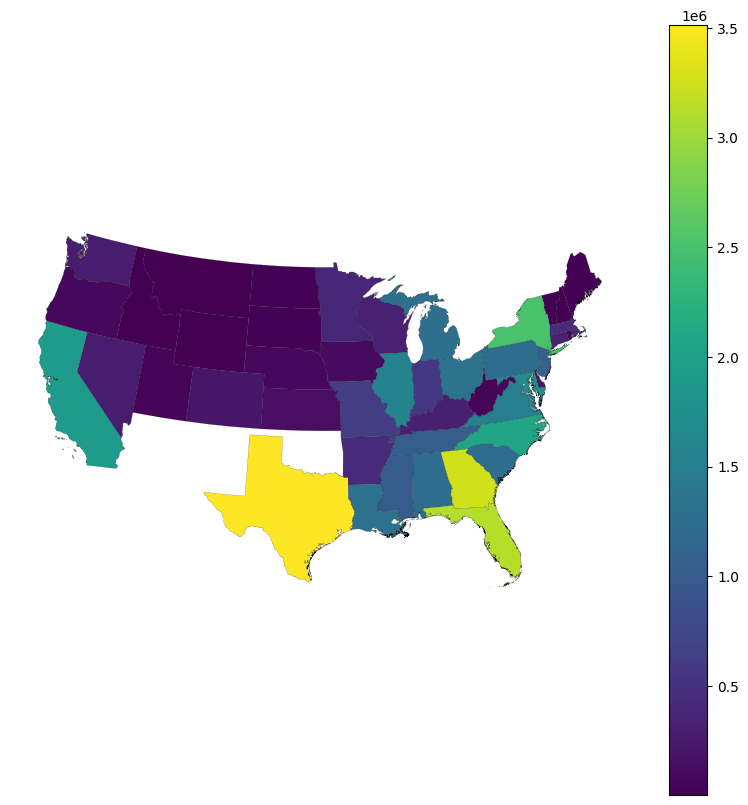

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_new.plot('Black', ax=ax, edgecolor='black', lw=.1, legend = True)
ax.set_axis_off() # Remove the axes

Take a moment to examine the map above. The lighter-colored states indicate areas with a higher number of people identifying as Black. For example, states like California and Texas stand out with relatively higher counts. However, it's important to consider that these states also have the largest overall populations, which naturally contributes to higher absolute numbers. Keep in mind that this map shows **counts**, not **proportions**—so larger states may appear prominent simply because more people live there overall.

## Normalization of Data

Raw or total values—like those shown in the map above—can be useful, but they often lead to misleading interpretations when used in choropleth maps. This is because larger areas tend to have higher totals simply due to their size, not necessarily because the variable of interest is more concentrated there.

For example, California may show a high total population of people identifying as Black—not necessarily because it has a higher proportion, but because it's a large state with a large overall population. In contrast, smaller states like Connecticut may have lower totals even if the proportion is higher.

This makes it difficult to fairly compare values between areas of different sizes. To address this, we **normalize** the data—typically by converting raw totals into rates, percentages, or densities. Normalization allows us to make more meaningful comparisons by accounting for differences in population size or geographic area.

In this next map, we are going to normalize the population per square mile. In our first step, we need to check the coordinate reference system (CRS). Remember,
- **CRS matters!** Area must be calculated in a **projected coordinate system**, not in a speherical coordinate system (e.g., latitude/longitude such as EPSG:4326), or the result will be incorrect.
- **EPSG:5070**, which is am equal-area projection, is a good choice for CONUS-wide analysis. For Alaska, Hawaii , or territories, you may want to choose region-specific projections.    

In [26]:
# Print the CRS
print(gdf.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


Erin TODO: change shapefile to lat long projected and make them re-project to EPSG 5070